# Creación de un modelo desde cero: normalización de lotes

## Librerías necesarias

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

## Variables globales del sistema

In [6]:
original_dir = pathlib.Path("ExpandedDataset/")
new_base_dir = pathlib.Path("ExpandedDataset_organized/")
content = os.listdir(original_dir)
BATCH_SIZE = 64
size_x = 256
size_y = 256

## Creación de los datasets específicos a partir de las carpetas 

In [7]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')

Found 9280 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.


## Modelo con normalización de lotes: modelo cuatro

In [3]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False,  padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model4 = keras.Model(inputs=inputs, outputs=outputs)

model4.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 254, 254, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 254, 254, 16) 64          conv2d[0][0]                     
______________________________________________________________________________________________

## Entrenamiento y guardado de resultados del modelo tres

In [8]:
model4.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model4.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset)

Epoch 1/30
145/145 [==============================] - 59s 207ms/step - loss: 2.9788 - accuracy: 0.2107 - val_loss: 5.6768 - val_accuracy: 0.0819
Epoch 2/30
145/145 [==============================] - 30s 202ms/step - loss: 1.9046 - accuracy: 0.4256 - val_loss: 3.8066 - val_accuracy: 0.1655
Epoch 3/30
145/145 [==============================] - 30s 198ms/step - loss: 1.4949 - accuracy: 0.5329 - val_loss: 1.8154 - val_accuracy: 0.4431
Epoch 4/30
145/145 [==============================] - 30s 197ms/step - loss: 1.2474 - accuracy: 0.6046 - val_loss: 1.8475 - val_accuracy: 0.4853
Epoch 5/30
145/145 [==============================] - 29s 196ms/step - loss: 1.0804 - accuracy: 0.6492 - val_loss: 2.4634 - val_accuracy: 0.4000
Epoch 6/30
145/145 [==============================] - 28s 186ms/step - loss: 0.9541 - accuracy: 0.6939 - val_loss: 1.3845 - val_accuracy: 0.5784
Epoch 7/30
145/145 [==============================] - 29s 194ms/step - loss: 0.8333 - accuracy: 0.7335 - val_loss: 1.2134 - val_ac

In [9]:
model4.save('model4/model')
np.save('model4/history.npy',history.history)

INFO:tensorflow:Assets written to: model4/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Análisis de resultados

In [10]:
my_history1=np.load('model3_3/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model4/history.npy',allow_pickle='TRUE').item()

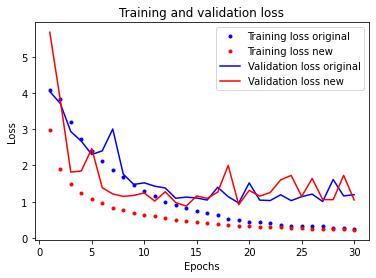

In [11]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

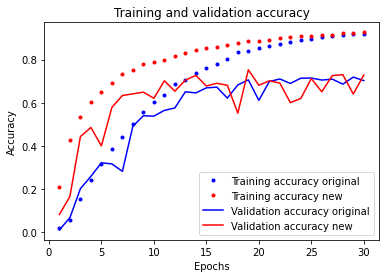

In [12]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
model = keras.models.load_model('model4/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 79ms/step - loss: 1.0733 - accuracy: 0.7241


[1.0732753276824951, 0.7241379022598267]

## Sustitución de la capa de aplanado: modelo 4.1

In [15]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False,  padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.GlobalAveragePooling2D()(x) 
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model4_1 = keras.Model(inputs=inputs, outputs=outputs)

model4_1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 256, 256, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 254, 254, 16) 432         rescaling_2[0][0]                
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 254, 254, 16) 64          conv2d_22[0][0]                  
____________________________________________________________________________________________

In [16]:
model4_1.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model4_1.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset)

Epoch 1/30
145/145 [==============================] - 31s 188ms/step - loss: 3.7092 - accuracy: 0.0876 - val_loss: 4.1916 - val_accuracy: 0.0267
Epoch 2/30
145/145 [==============================] - 29s 190ms/step - loss: 3.0036 - accuracy: 0.1857 - val_loss: 4.6574 - val_accuracy: 0.0509
Epoch 3/30
145/145 [==============================] - 29s 189ms/step - loss: 2.5648 - accuracy: 0.2731 - val_loss: 3.2180 - val_accuracy: 0.1724
Epoch 4/30
145/145 [==============================] - 29s 193ms/step - loss: 2.2760 - accuracy: 0.3246 - val_loss: 2.9027 - val_accuracy: 0.2267
Epoch 5/30
145/145 [==============================] - 29s 193ms/step - loss: 2.0521 - accuracy: 0.3752 - val_loss: 2.7136 - val_accuracy: 0.2647
Epoch 6/30
145/145 [==============================] - 29s 193ms/step - loss: 1.8873 - accuracy: 0.4182 - val_loss: 2.4731 - val_accuracy: 0.3422
Epoch 7/30
145/145 [==============================] - 29s 193ms/step - loss: 1.7529 - accuracy: 0.4557 - val_loss: 1.8070 - val_ac

In [17]:
model4_1.save('model4_1/model')
np.save('model4_1/history.npy',history.history)

INFO:tensorflow:Assets written to: model4_1/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Análisis de resultados

In [18]:
my_history1=np.load('model4/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model4_1/history.npy',allow_pickle='TRUE').item()

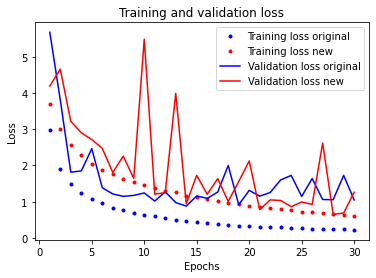

In [19]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

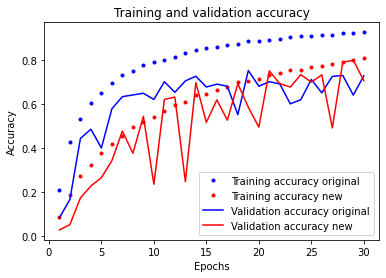

In [20]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
model = keras.models.load_model('model4_1/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 79ms/step - loss: 1.3381 - accuracy: 0.6776


[1.3381006717681885, 0.6775861978530884]